# EDA 

The purpose of this analysis is to explore and understand the given data and perform data exploration, cleaning and preprocessing for future model and feature selection. 

In [ ]:
import pandas as pd 
import numpy as np 
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ks_2samp
from itertools import combinations

## Data Overview and Loading

In [91]:
ds = pd.read_csv('./CW1_train.csv')

In [4]:
ds.shape

(10000, 31)

## Data types of all features 
There are three categorical data types: cut, color and clarity, while the remaining variables are float digits and price (integers).

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outcome  10000 non-null  float64
 1   carat    10000 non-null  float64
 2   cut      10000 non-null  object 
 3   color    10000 non-null  object 
 4   clarity  10000 non-null  object 
 5   depth    10000 non-null  float64
 6   table    10000 non-null  float64
 7   price    10000 non-null  int64  
 8   x        10000 non-null  float64
 9   y        10000 non-null  float64
 10  z        10000 non-null  float64
 11  a1       10000 non-null  float64
 12  a2       10000 non-null  float64
 13  a3       10000 non-null  float64
 14  a4       10000 non-null  float64
 15  a5       10000 non-null  float64
 16  b1       10000 non-null  float64
 17  b2       10000 non-null  float64
 18  b3       10000 non-null  float64
 19  b4       10000 non-null  float64
 20  b5       10000 non-null  float64
 21  a6       1000

This dataset has a total of 10000 records and 31 columns including outcome. Interestingly, the carat range is 0.2 to 4.0, with a median of 0.7 carats. This might indicate a possibility of outlier values.
From observation, features: a1, a2, a3, a4 seem to share very similar distributions, if not the same. As the highest and lowest value mean between the variables have a difference as 0.00606. The same can be observed from the standard deviation, min and max values with the following differences: 0.0098337, 0.000075 and 0.000187.
The same can be observed with sets: (a6, a7) and (b1, b2, b3, b4).

In [34]:
ds.describe()

outcome         carat           cut         color       clarity  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -4.979081      0.798407      2.550600      2.582000      3.836200   
std       12.722224      0.472046      1.035252      1.699401      1.726924   
min      -44.879471      0.200000      0.000000      0.000000      0.000000   
25%      -13.989962      0.400000      2.000000      1.000000      2.000000   
50%       -5.442794      0.710000      2.000000      3.000000      4.000000   
75%        3.918593      1.040000      3.000000      4.000000      5.000000   
max       39.675966      4.000000      4.000000      6.000000      7.000000   

              depth         table         price             x             y  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      61.748060     57.467360   3910.841900      5.733974      5.741665   
std        1.429631      2.247036   3940.369616      1.114850      1.228057   
min       50.800000     44.000000    326.000000      0.000000      0.000000   
25%       61.000000     56.000000    965.000000      4.730000      4.740000   
50%       61.900000     57.000000   2441.000000      5.700000      5.720000   
75%       62.500000     59.000000   5226.000000      6.530000      6.530000   
max       70.500000     73.000000  18791.000000     10.010000     58.900000   

       ...            a6            a7            a8            a9  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...     -0.011806     -0.009992     -0.021856     -0.009286   
std    ...      0.999700      1.000633      1.010847      1.010200   
min    ...     -3.750688     -3.701252     -3.810713     -3.549324   
25%    ...     -0.672814     -0.697088     -0.696779     -0.674015   
50%    ...     -0.013058      0.000265     -0.005496     -0.010254   
75%    ...      0.640883      0.673117      0.645305      0.669159   
max    ...      3.601364      3.593209      4.243395      3.714985   

                a10            b6            b7            b8            b9  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.012731     -0.007407     -0.002919     -0.015392      0.000051   
std        1.003570      0.997181      0.992112      0.991442      1.005808   
min       -3.532430     -3.740254     -3.987845     -4.244733     -3.649063   
25%       -0.681433     -0.687482     -0.666360     -0.678384     -0.667726   
50%       -0.017385      0.001915      0.022894     -0.009743     -0.010082   
75%        0.671203      0.659154      0.654947      0.653020      0.684738   
max        4.135685      4.012513      3.812652      3.996531      3.808169   

                b10  
count  10000.000000  
mean      -0.008890  
std        1.005258  
min       -3.862407  
25%       -0.680576  
50%       -0.016215  
75%        0.656871  
max        3.471238  

[8 rows x 31 columns]

In [7]:
ds.head()

outcome  carat        cut color clarity  depth  table  price     x     y  \
0 -26.701232   1.14      Ideal     G     VS1   62.3   56.0   7948  6.73  6.70   
1   6.548093   0.38    Premium     H     VS2   60.5   59.0    898  4.69  4.66   
2   6.612562   0.50  Very Good     E     SI1   60.7   58.0   1351  5.09  5.13   
3  -5.073562   0.70    Premium     D     SI1   61.2   58.0   2512  5.74  5.70   
4 -14.436557   0.83      Ideal     G     SI2   62.4   54.0   2751  6.01  6.08   

   ...        a6        a7        a8        a9       a10        b6        b7  \
0  ...  0.168836 -0.273758  1.107832  1.247795  0.482344  0.489511 -0.321138   
1  ... -0.256549  0.315373 -0.030326 -0.114335 -1.059588 -1.761360 -1.343951   
2  ... -1.193327 -0.657307 -0.591726 -0.446856 -0.765286 -0.816544 -1.397794   
3  ... -1.740788 -1.778860 -0.825070  0.444932  1.173109  0.453606 -0.263440   
4  ... -0.859322  1.409268  0.861992  1.109063 -1.436722 -1.461618  0.081787   

         b8        b9       b10  
0  0.573382  0.446871 -1.990581  
1 -1.002550 -0.225030 -0.446653  
2 -0.477130  0.810509  1.725131  
3  0.246210 -0.850503 -0.412950  
4  0.258087  0.851146  2.204813  

[5 rows x 31 columns]

## Data Cleaning and Preprocessing

Check for missing values and duplicates

In [92]:
ds = ds.drop_duplicates()
ds.isnull().values.any()

np.False_

In [93]:
label_encoder = LabelEncoder()
ds['color'] = label_encoder.fit_transform(ds['color'])
ds['cut'] = label_encoder.fit_transform(ds['cut'])
ds['clarity'] = label_encoder.fit_transform(ds['clarity'])

# Data Observations

## Following up on Distribution Observation

I conducted a two-sample, two-sided Kolmogorov-Smirnov test (KS-2) to compare distributions. The null hypothesis (H0) states that the two samples come from the same distribution, while the alternative hypothesis (Ha) suggests they come from different distributions. 

Setting the significance level at α=0.05, we can calculate the approximate cirtical value Dα, as follows:
​
For α = 0.05 and sample sizes 10000 and 10000. 
Dα = 1.34 ((10000+10000)/ (10000 * 10000)) ^ 0.5  = 0.019233339445

In [ ]:
# tests if a given set of variables are all from the same distribution 
# n sample kolmogorov-smirnov test 
def set_ks_test(set):
    same_dist = False

    # calcualte critical value 
    crit_val = 1.34 * math.sqrt((len(ds) + len(ds))/ (len(ds) * len(ds)))

    # final all pair combinations of variables 
    possible_pairs = list(combinations(set, 2 ))

    # conduct two-sided kolmogorov smirnov test for every pair 
    for p in possible_pairs:
        result = ks_2samp(ds[p[0]], ds[p[1]])
        if result.statistic < crit_val:
            same_dist = True
        else:
            # if one pair reject the null hypothesis then the set of variables
            # must not be from the same distribution. 
            same_dist = False
            break

    print(f'is {set} from same distribution? {"Not reject Null" if same_dist else "Reject Null"}\n')

In [76]:
set_ks_test(['a1', 'a2', 'a3', 'a4', 'a5'])
set_ks_test(['a6', 'a7', 'a8', 'a9', 'a10'])
set_ks_test(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10'])

set_ks_test(['b1', 'b2', 'b3', 'b4', 'b5'])
set_ks_test(['b6', 'b7', 'b8', 'b9', 'b10'])
set_ks_test(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10'])

set_ks_test(['a1', 'a2', 'a3', 'a4', 'a5','b1', 'b2', 'b3', 'b4', 'b5'])
set_ks_test(['a6', 'a7', 'a8', 'a9', 'a10','b6', 'b7', 'b8', 'b9', 'b10'])
set_ks_test(['a6', 'a7', 'a8', 'a9', 'a10','b6', 'b7', 'b8', 'b9', 'b10', 'a1', 'a2', 'a3', 'a4', 'a5','b1', 'b2', 'b3', 'b4', 'b5'])

is ['a1', 'a2', 'a3', 'a4', 'a5'] from same distribution? Not reject Null

is ['a6', 'a7', 'a8', 'a9', 'a10'] from same distribution? Not reject Null

is ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10'] from same distribution? Reject Null

is ['b1', 'b2', 'b3', 'b4', 'b5'] from same distribution? Not reject Null

is ['b6', 'b7', 'b8', 'b9', 'b10'] from same distribution? Not reject Null

is ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10'] from same distribution? Reject Null

is ['a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5'] from same distribution? Reject Null

is ['a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10'] from same distribution? Not reject Null

is ['a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5'] from same distribution? Reject Null



Based on the experimentation above, it can be hypothesised that the variables 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', and 'b10' likely belong to the same distribution. Similarly, the sets of variables ('a1', 'a2', 'a3', 'a4', 'a5') and ('b1', 'b2', 'b3', 'b4', 'b5') also appear to share the same distribution within their respective sets.

This insight could inform our feature selection process. However, it is crucial to note that excluding variables hypothesised to belong to the same distribution may negatively impact model performance. For instance, removing features such as 'a2', 'a3', 'a4', and 'a5' while retaining only 'a1' does not necessarily guarantee improved model performance.

## Scatterplot and Line of Best fit 

Each feature/variable was independently plotted against the target variable, outcome. From simple observation, the variable with the strongest negative correlation is Depth, while Table shows a slight positive correlation. These relationships could be further examined using Spearman and Pearson correlations.

It is also noticeable that the variables X, Y, and Z have outliers with zero values. Without additional context or domain knowledge, it is unclear whether these outliers are erroneous.

Additionally, the plots for a1 to a5 and b1 to b5 appear to be identically distributed, as do the plots for a6 to a10 and b6 to b10.

The scatterplots also help us identify the linearity of relationships between each independent variable and the dependent variable, outcome. However, it is evident that most features do not exhibit a linear relationship, as seen from the clustering and curved patterns in several plots. This suggests that a linear model may not be suitable for mapping the relationship to the desired output. Features such as X, Y, Z, a7, b9, and others exhibit this non-linear behavior.

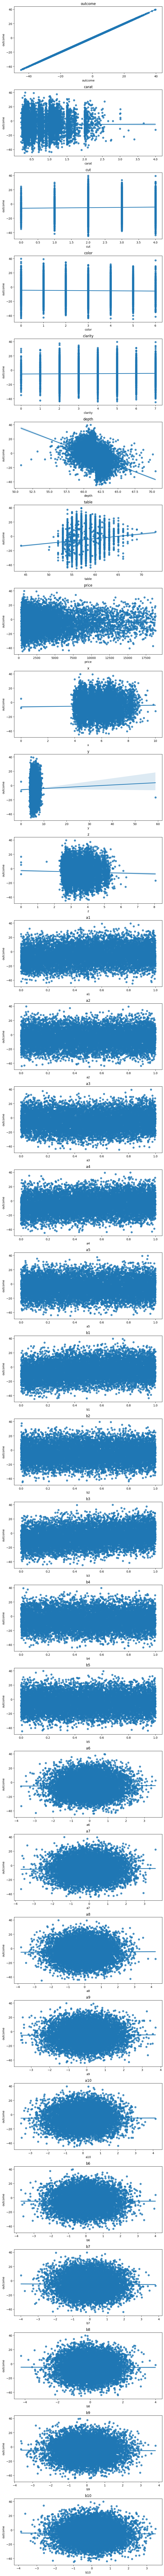

In [19]:
# define subplots 
fig, axis = plt.subplots(len(ds.columns), 1, figsize=(8,len(ds.columns)*4), tight_layout=True)

# plot features against outcome 
for count, value in enumerate(ds.columns):
    sns.regplot(ax=axis[count], data=ds, x=value, y=ds.columns[0])
    axis[count].set_title(value)

## Boxplots and Counting Outliers

Boxplots help us describe the distribution of the data and identify outliers that lie outside the interquartile range (IQR). We can also quantify the number of points that fall outside the IQR.

Based on the boxplot, Carat is heavily positively skewed to the right, as indicated by the skewed IQR. The presence of 333 outliers contributes to this rightward skew.

Price follows a similar pattern, with a positive skew to the right and over 676 outliers. This may suggest that the distribution is not normal.

Depth shows a more even distribution of outliers on both sides of the IQR, which could indicate a normal distribution.

Table appears slightly skewed to the left, with sparse outliers on one side of the data.

Interestingly, variables a1 to a5 and b1 to b5 do not exhibit any outliers and appear to have no significant skew, possibly indicating a normal distribution. Lastly, a6 to a10 and b6 to b10 show slightly varying medians and IQRs, but overall, they do not appear to be skewed by any significant outliers.

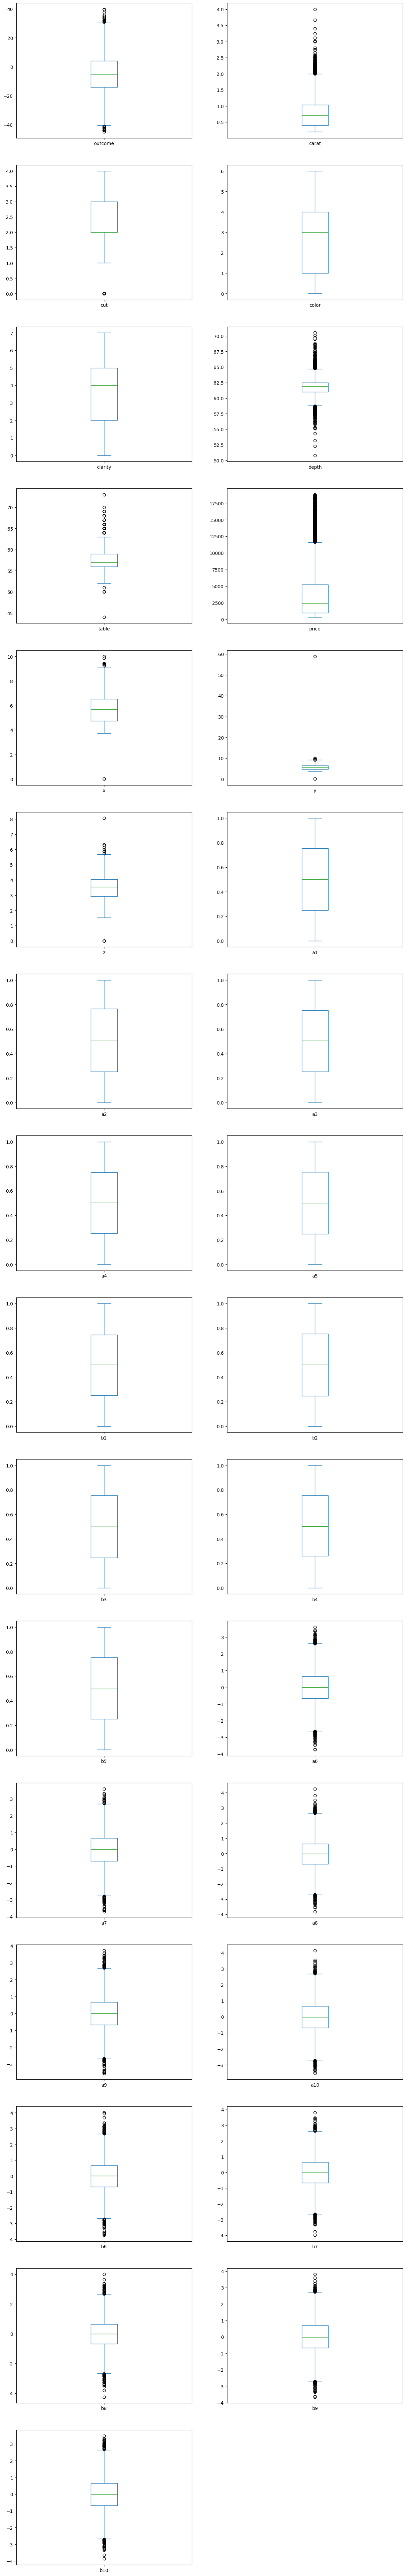

In [20]:
# Boxplot of all features 
ds.plot(kind='box',
        figsize=(15,100),
        subplots=True,
        layout=(int(math.ceil(len(ds.columns)/2)),
                2))
plt.show()

In [85]:
# plot number of outliers
q1 = ds.quantile(0.25)
q3 = ds.quantile(0.75)
iqr = q3 - q1

((ds < (q1 - 1.5 * iqr)) | (ds > (q3 + 1.5 * iqr))).sum()

outcome     26
carat      333
cut        300
color        0
clarity      0
depth      461
table      132
price      676
x           10
y            9
z           12
a1           0
a2           0
a3           0
a4           0
a5           0
b1           0
b2           0
b3           0
b4           0
b5           0
a6          93
a7          59
a8          89
a9          83
a10         74
b6          65
b7          76
b8          72
b9          85
b10         75
dtype: int64

## Histograms

Histograms help us assess potential class imbalances in categorical data and determine whether certain variables follow a normal distribution.

From the plots, Outcome appears to follow a normal distribution. Depth, although skewed, also shows a normal curve, with long tails on either side of the quartiles due to a high number of balanced outliers. Similarly, a6 to a10 and b6 to b10 display symmetrical, bell-shaped curves, suggesting normal distributions.

On the other hand, Carat, Price, X, Y, and Z do not exhibit normal curves, as they are asymmetrical and skewed. Additionally, a1 to a5 and b1 to b5 do not display normal curves, further indicating that they are not normally distributed.

All categorical variables, which have been label-encoded, show significant class imbalances. For example, the Cut variable has one category with over 4,000 samples, while another category has fewer than 500 samples. This disproportionate distribution of categories can lead to biased models that are more likely to misclassify the minority class.

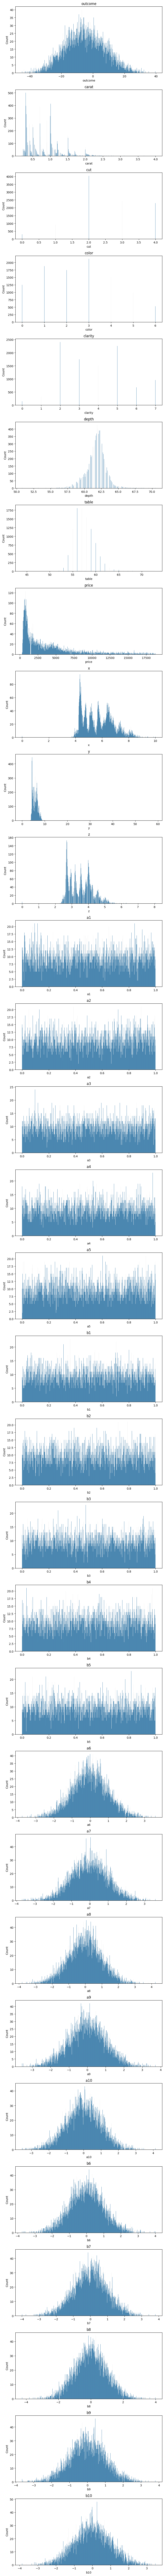

In [21]:
# define subplots 
fig, axis = plt.subplots(len(ds.columns), 1, figsize=(8,len(ds.columns)*4), tight_layout=True)

# plot each feature
for count, value in enumerate(ds.columns):
    sns.histplot(ax=axis[count], data=ds, x=value, bins=1000)
    axis[count].set_title(value)
plt.show()

To confirm our observations from the histogram plots, we can see that y, price and carat are some of the most positively skewed variable. The skew is reflected in the asymmetry of the histogram plots, which could negatively impact model performance. 

In [22]:
ds.skew()

outcome    0.083080
carat      1.153380
cut       -0.170263
color      0.206708
clarity    0.176618
depth     -0.230483
table      0.721103
price      1.633379
x          0.373087
y          8.372088
z          0.364712
a1        -0.010857
a2        -0.027996
a3        -0.003662
a4        -0.019157
a5         0.007531
b1        -0.000258
b2         0.000515
b3         0.003986
b4        -0.007648
b5         0.012293
a6        -0.000117
a7        -0.033658
a8        -0.034436
a9        -0.020444
a10       -0.015344
b6         0.007632
b7        -0.058334
b8        -0.034361
b9        -0.009831
b10        0.019527
dtype: float64

# Correlation

## Pearson

When comparing the Pearson correlation rankings between label encoding and one-hot encoding, both methods identify Depth as the variable most significantly correlated with Outcome, with a negative correlation of -0.41. This is followed by features such as b3, b1, a1, a4, and Table. Although these features show some correlation with Outcome, the correlation values are not strong enough to indicate a significant impact, suggesting there is no strong overall correlation between Outcome and most other variables.

Interestingly, both label encoding and one-hot encoding reveal a small correlation between Cut and Outcome. However, one-hot encoding provides additional insight, showing which specific category of Cut has a stronger correlation. In this case, the category Cut_Good has a correlation of 0.075, which is notably higher than the 0.033 correlation observed with label encoding. This extra information can be particularly valuable during feature selection.

### Label encoding

<Axes: >

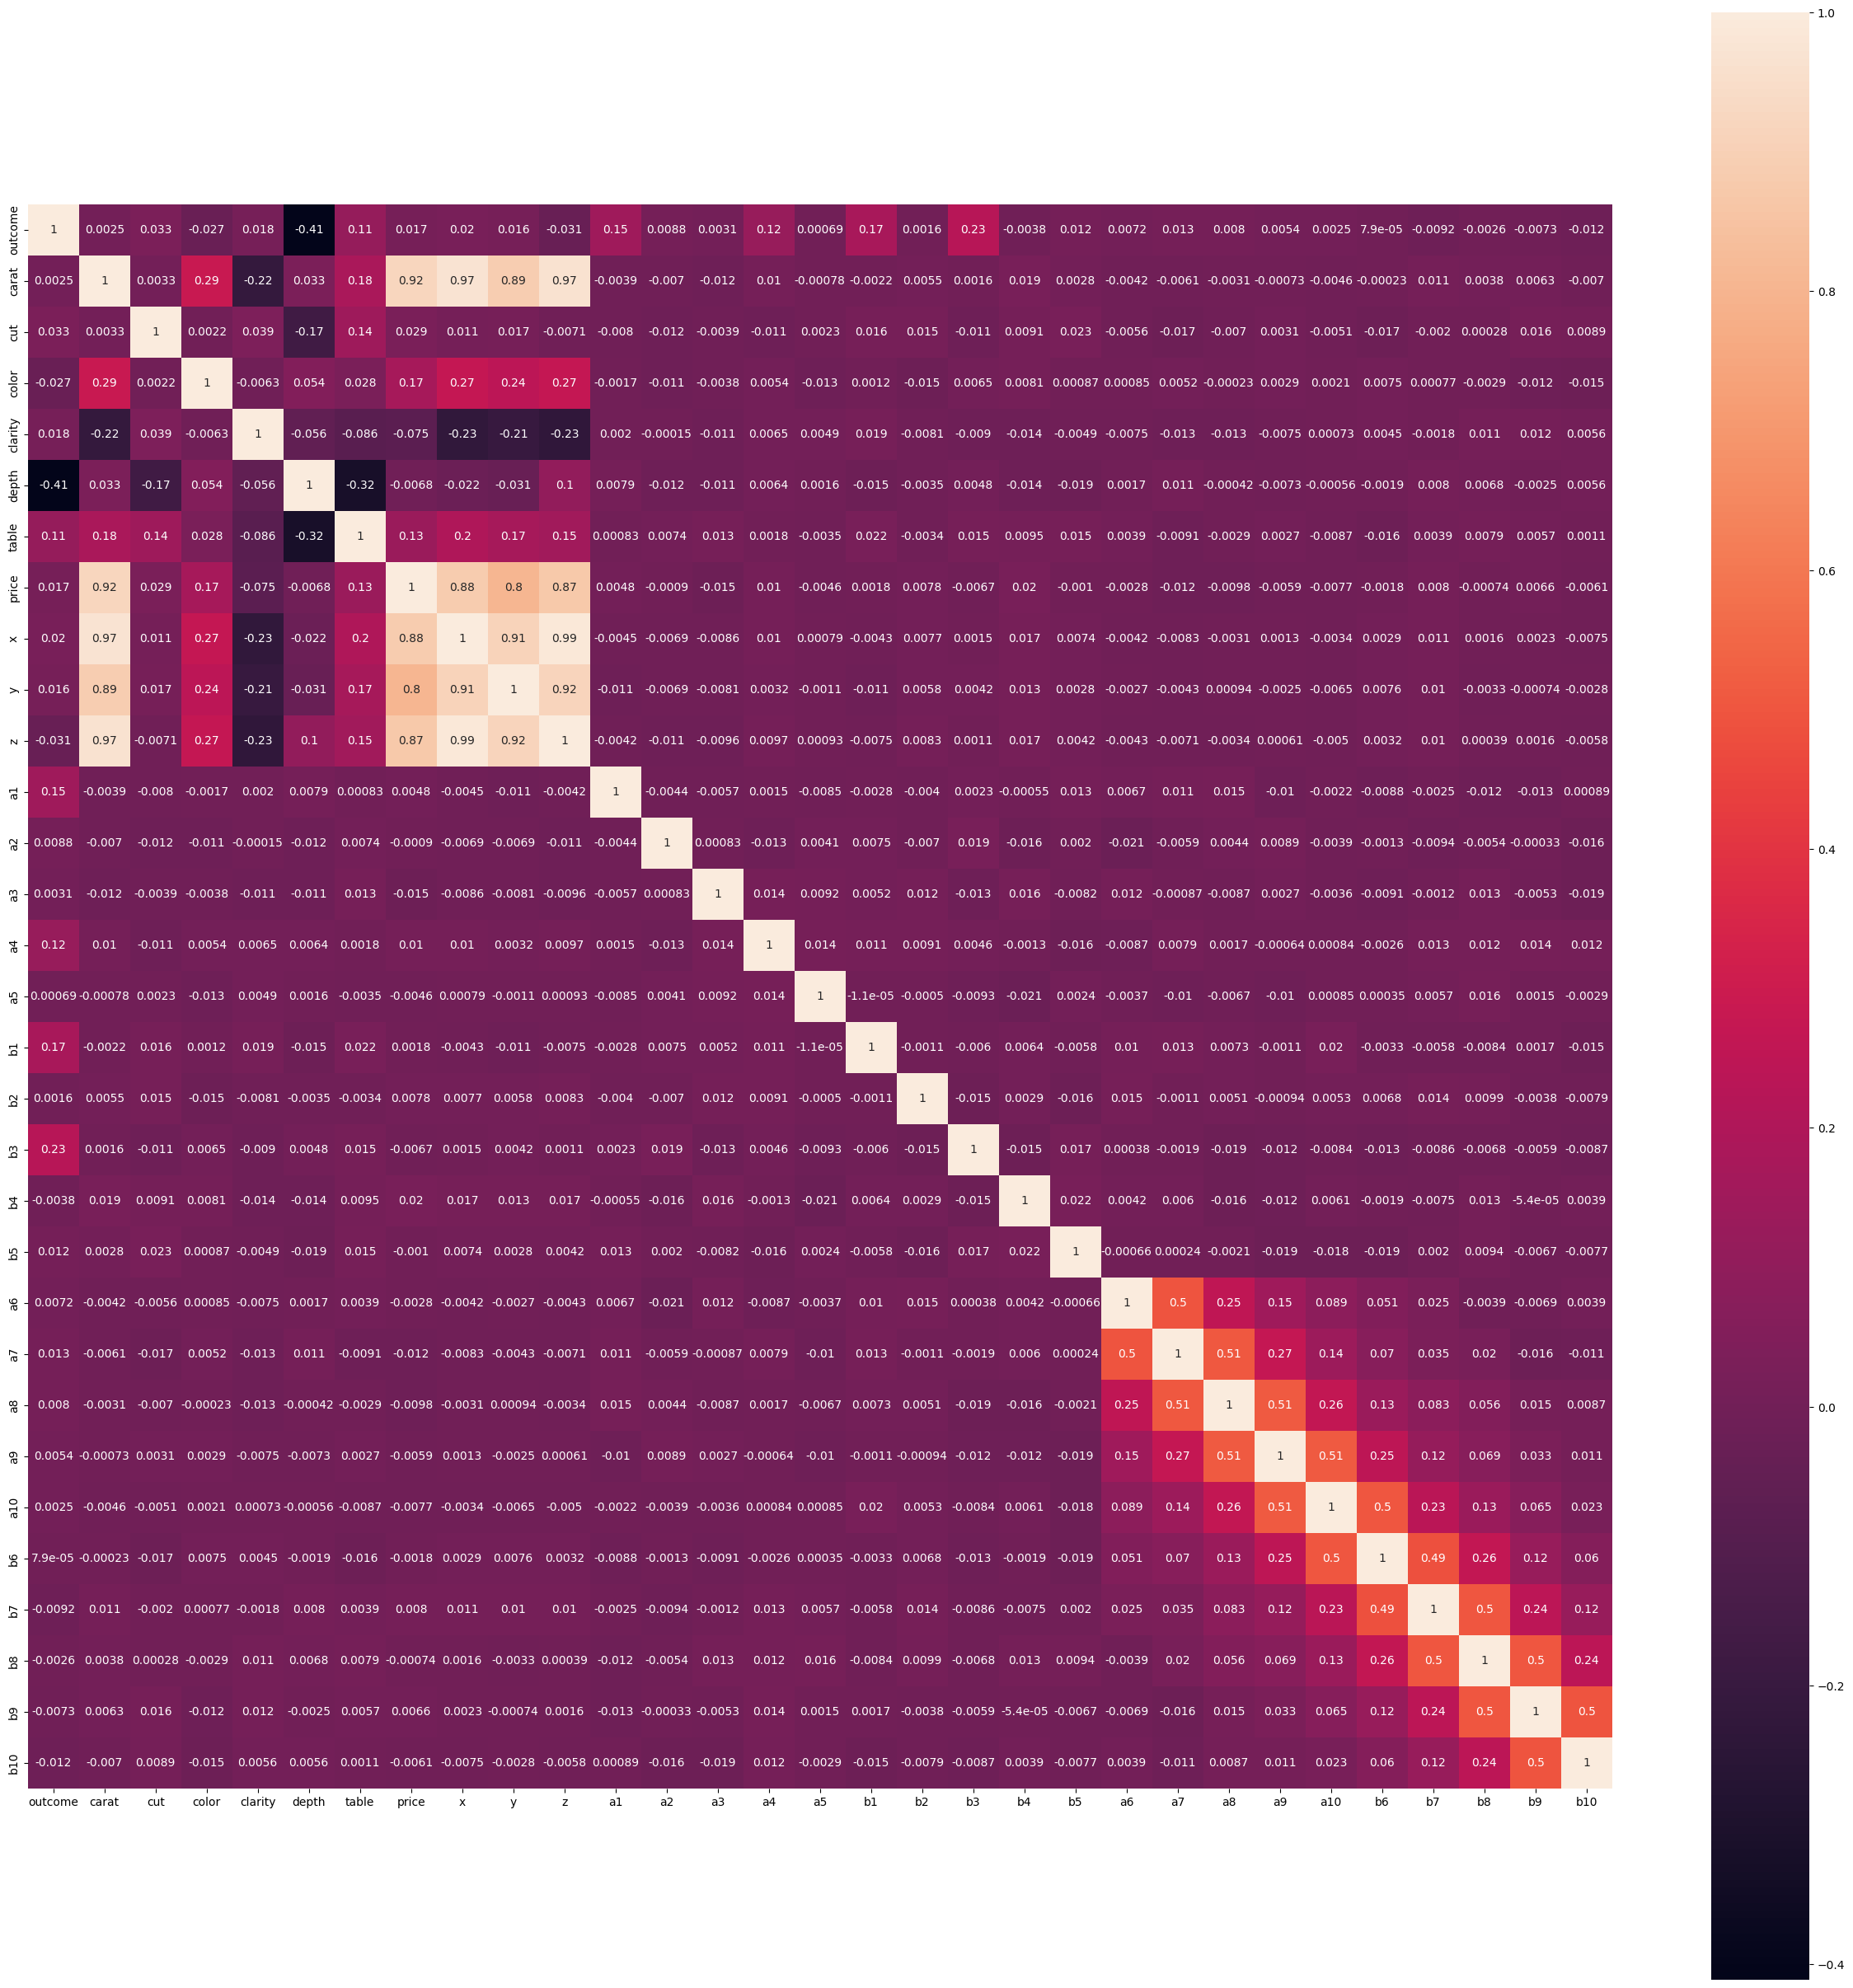

In [23]:
# Plot heat map to see the correlation among the variables
corr = ds.corr(method='pearson')
plt.figure(figsize = (len(ds.columns),len(ds.columns))) #To set the figure size
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

### One-Hot Encoding

In [95]:
# One-hot encoded correlation 

# Reload dataset 
ds = pd.read_csv('./CW1_train.csv')

# Identify categorical columns
categorical_cols = ['cut', 'color', 'clarity']  # Replace with actual categorical column names

# One-hot encode categorical variables
ds_onehot = pd.get_dummies(ds, columns=categorical_cols, drop_first=True)

# Calculate correlation between outcome and every other feature 
correlations = ds_onehot.corr(method='pearson')
outcome_correlations = correlations['outcome']
outcome_correlations = (abs(outcome_correlations)).sort_values(ascending=False)

outcome_correlations

outcome          1.000000
depth            0.411073
b3               0.225407
b1               0.173719
a1               0.149101
a4               0.122441
table            0.114977
cut_Good         0.075311
cut_Premium      0.063544
cut_Very Good    0.035618
cut_Ideal        0.034769
z                0.031470
clarity_SI1      0.031296
color_G          0.028744
color_J          0.024187
color_E          0.021906
color_H          0.021096
x                0.020354
clarity_VS1      0.017983
price            0.016967
y                0.015924
clarity_IF       0.015535
a7               0.012512
b5               0.012370
color_I          0.012363
b10              0.012036
clarity_VVS2     0.009951
clarity_VVS1     0.009886
b7               0.009241
a2               0.008760
a8               0.007983
b9               0.007324
a6               0.007238
clarity_SI2      0.006701
clarity_VS2      0.006620
a9               0.005361
b4               0.003845
a3               0.003126
b8          

## Spearman

When comparing between spearman correlation and pearson, the ranking of different features (one-hot encoded or label encoding) are the same. Except for the fact that the correlation factor for some features, such as Depth, appear to be more significant. With spearman correlation, depth has a correlation of 0.51 (to 1.dp) while pearson correlation has a value of 0.41. 

### Label-Encoding

<Axes: >

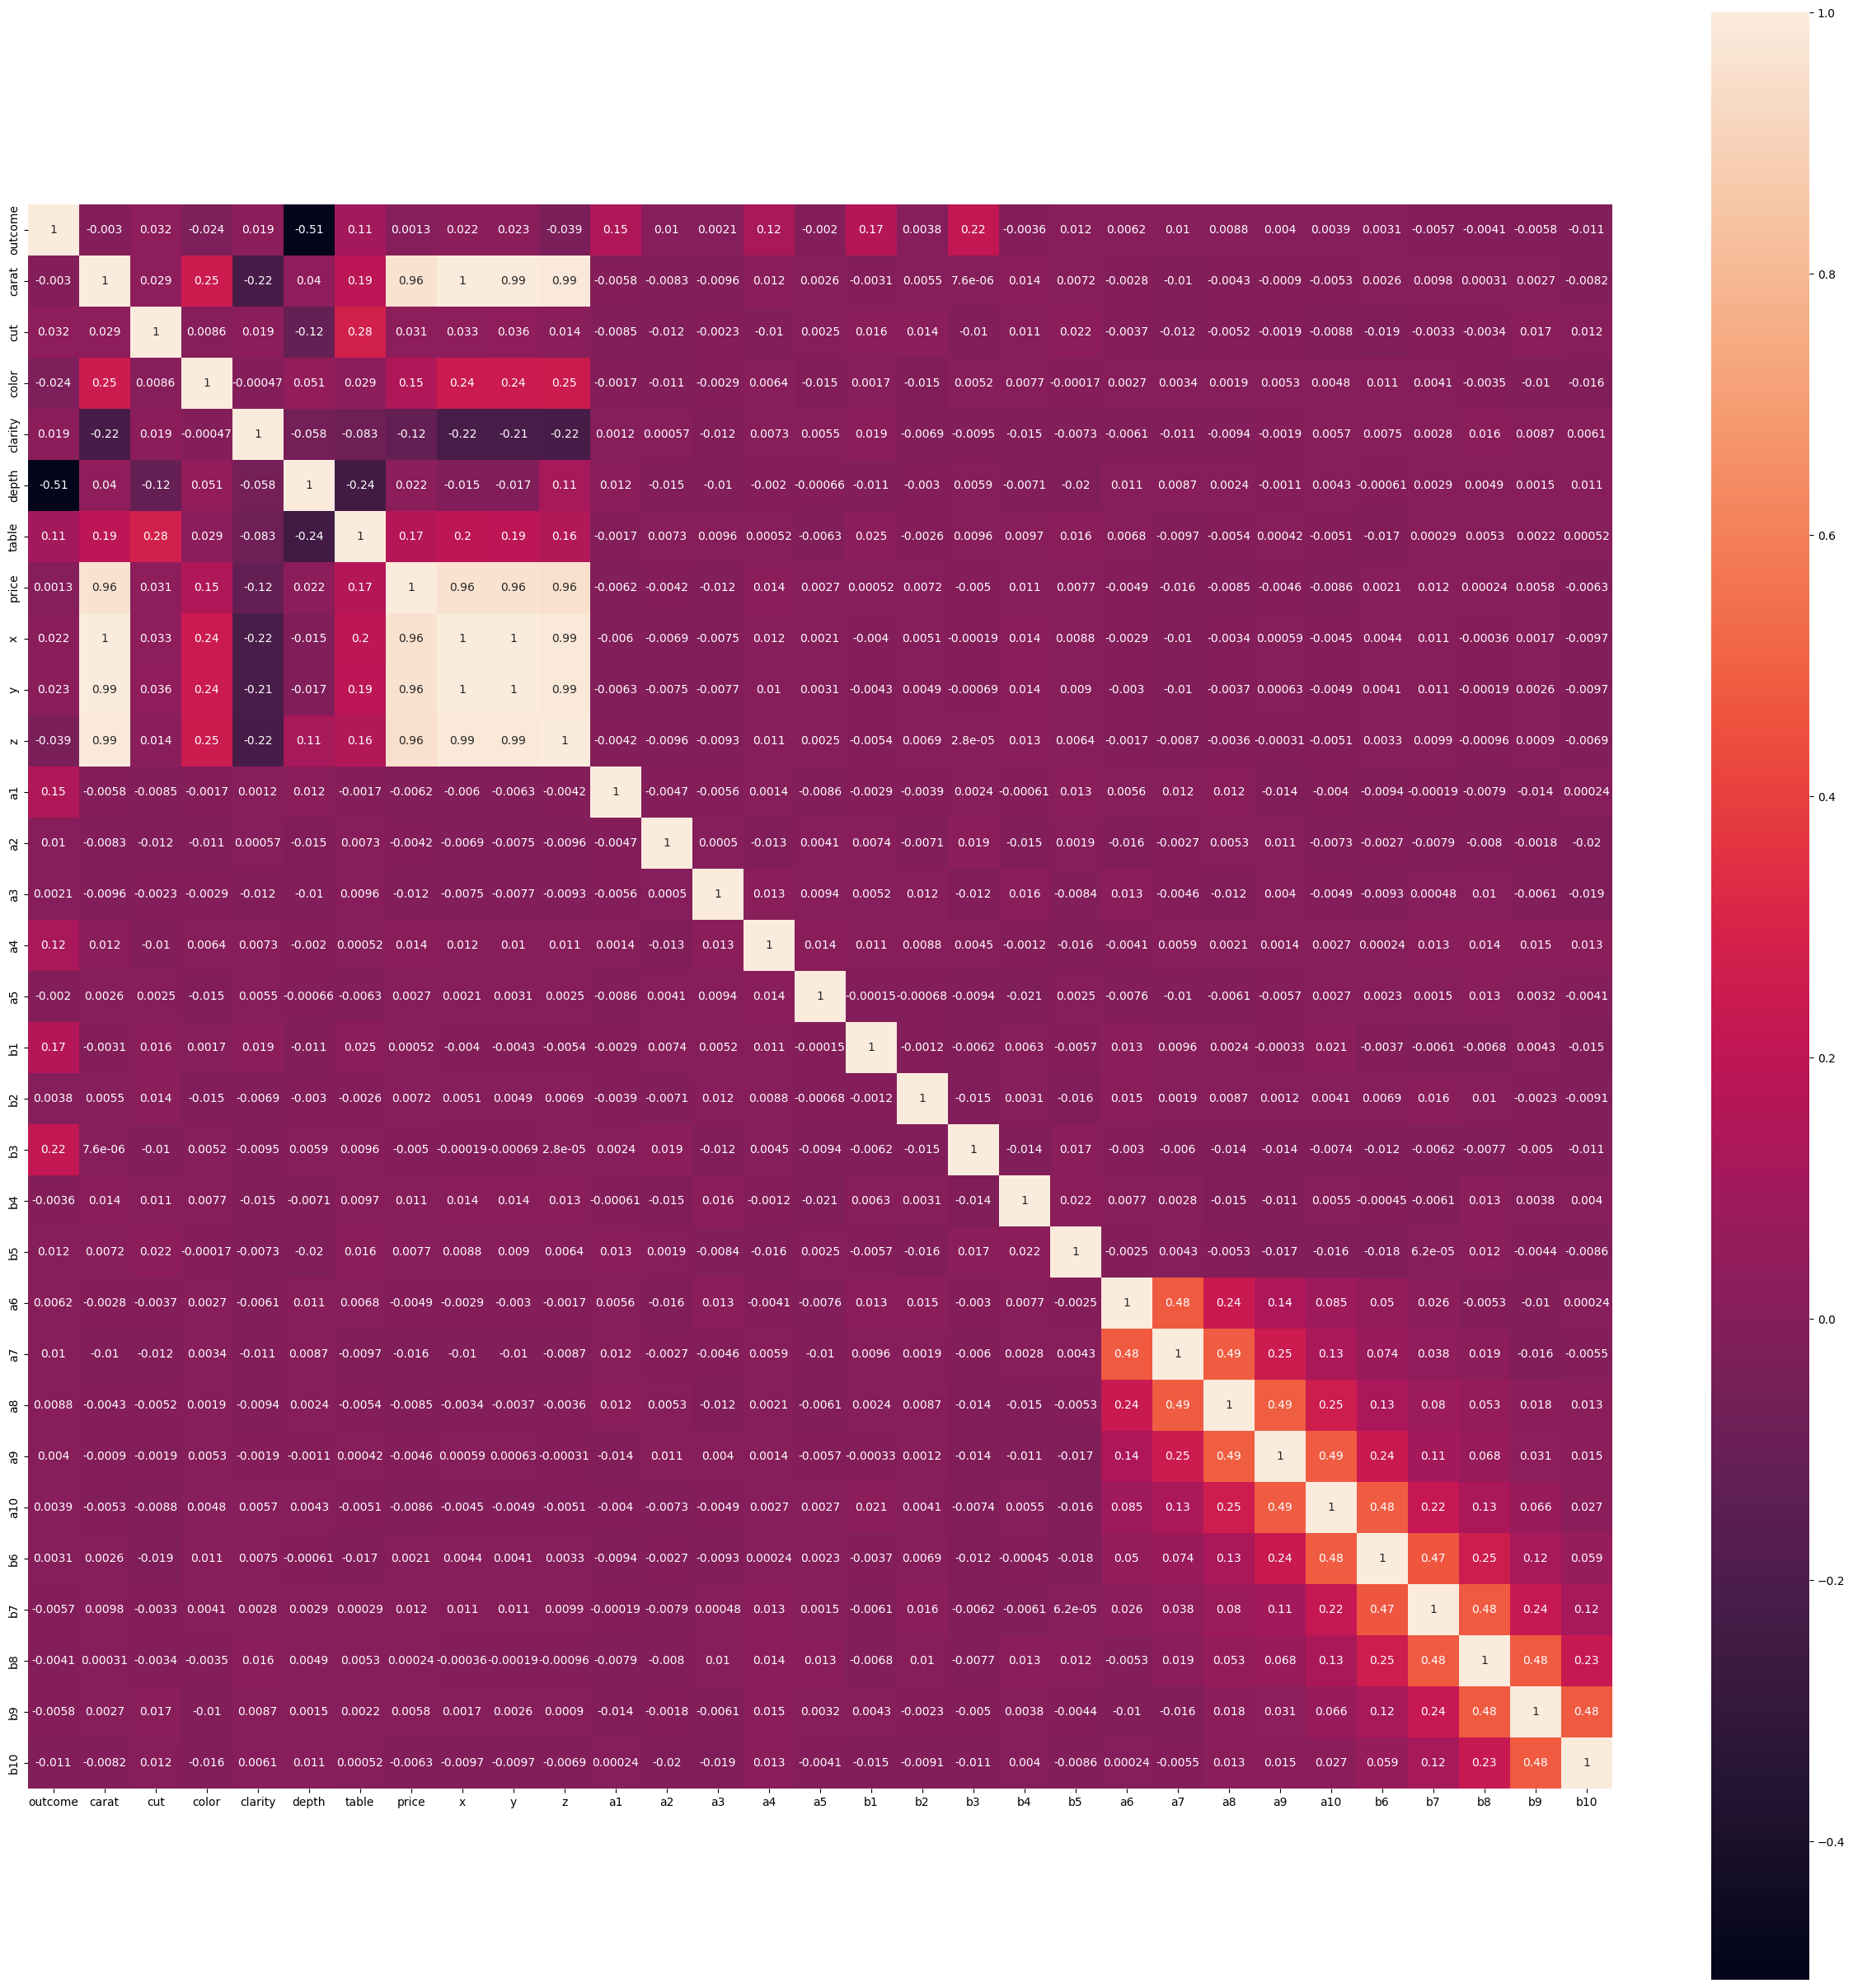

In [24]:
#Plot heat map to see the correlation among the variables
corr = ds.corr(method='spearman')
plt.figure(figsize = (len(ds.columns),len(ds.columns))) #To set the figure size
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

## One-Hot Encoding

In [96]:
correlations = ds_onehot.corr(method='spearman')
outcome_correlations = correlations['outcome']
outcome_correlations = (abs(outcome_correlations)).sort_values(ascending=False)

outcome_correlations

outcome          1.000000
depth            0.505889
b3               0.217254
b1               0.168709
a1               0.146819
a4               0.120144
table            0.107133
cut_Good         0.076893
cut_Premium      0.064034
z                0.039103
cut_Ideal        0.034924
cut_Very Good    0.034496
clarity_SI1      0.031683
color_G          0.028179
color_J          0.023592
y                0.022747
x                0.021642
color_H          0.021181
clarity_VS1      0.019188
color_E          0.019111
clarity_IF       0.018326
clarity_VVS1     0.012807
color_I          0.011627
b5               0.011562
b10              0.011404
clarity_VVS2     0.010749
a2               0.010101
a7               0.009969
clarity_VS2      0.009039
a8               0.008762
a6               0.006155
b9               0.005802
b7               0.005737
clarity_SI2      0.005328
b8               0.004083
a9               0.004011
a10              0.003941
color_F          0.003883
b2          